# Environment and reward functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

In [ ]:
class Student_type1():
    def __init__(self):
        f1 = truncnorm(a=(0-75)/10, b=(100-75)/10, loc=75, scale=10).rvs(size=1).astype(int)[0]
        f2 = truncnorm(a=(0-50)/10, b=(100-50)/10, loc=50, scale=10).rvs(size=1).astype(int)[0]
        f3 = truncnorm(a=(0-25)/10, b=(100-25)/10, loc=25, scale=10).rvs(size=1).astype(int)[0]
        self.features = [f1,f2,f3]

    # just for evaluation
    def get_type(self):
        return 1

    def get_features(self):
        return self.features

    def get_reward(self,action,selected_type):
        type_error = 0
        if(selected_type != 1):
          type_error = 1

        if action == 0:
            score = truncnorm(a=(0-40)/40, b=(100-40)/40, loc=40, scale=40).rvs(size=1).astype(int)[0]
        elif action == 1:
            score = truncnorm(a=(0-60)/10, b=(100-60)/10, loc=60, scale=10).rvs(size=1).astype(int)[0]
        else:
            score = truncnorm(a=(0-50)/20, b=(100-50)/20, loc=50, scale=20).rvs(size=1).astype(int)[0]

        return 0.5*score + (1-type_error)*20

In [ ]:
class Student_type2():
    def __init__(self):
        f1 = truncnorm(a=(0-25)/10, b=(100-25)/10, loc=25, scale=10).rvs(size=1).astype(int)[0]
        f2 = truncnorm(a=(0-50)/10, b=(100-50)/10, loc=50, scale=10).rvs(size=1).astype(int)[0]
        f3 = truncnorm(a=(0-25)/10, b=(100-25)/10, loc=25, scale=10).rvs(size=1).astype(int)[0]
        self.features = [f1,f2,f3]

    # just for evaluation
    def get_type(self):
        return 2

    def get_features(self):
        return self.features

    def get_reward(self,action,selected_type):
        type_error = 0
        if(selected_type != 2):
          type_error = 1

        if action == 0:
            score = truncnorm(a=(0-70)/50, b=(100-70)/50, loc=70, scale=50).rvs(size=1).astype(int)[0]
        elif action == 1:
            score = truncnorm(a=(0-50)/30, b=(100-50)/30, loc=50, scale=30).rvs(size=1).astype(int)[0]
        else:
            score = truncnorm(a=(0-60)/20, b=(100-60)/20, loc=60, scale=20).rvs(size=1).astype(int)[0]

        return 0.5*score + (1-type_error)*20

In [ ]:
class Student_type3():
    def __init__(self):
        f1 = truncnorm(a=(0-50)/10, b=(100-50)/10, loc=50, scale=10).rvs(size=1).astype(int)[0]
        f2 = truncnorm(a=(0-75)/10, b=(100-75)/10, loc=75, scale=10).rvs(size=1).astype(int)[0]
        f3 = truncnorm(a=(0-75)/10, b=(100-75)/10, loc=75, scale=10).rvs(size=1).astype(int)[0]
        self.features = [f1,f2,f3]

    # just for evaluation
    def get_type(self):
        return 3

    def get_features(self):
        return self.features

    def get_reward(self,action,selected_type):
        type_error = 0
        if(selected_type != 3):
          type_error = 1
        if action == 0:
            score = truncnorm(a=(0-20)/70, b=(100-20)/70, loc=20, scale=70).rvs(size=1).astype(int)[0]
        elif action == 1:
            score = truncnorm(a=(0-50)/10, b=(100-50)/10, loc=50, scale=10).rvs(size=1).astype(int)[0]
        else:
            score = truncnorm(a=(0-55)/5, b=(100-55)/5, loc=55, scale=5).rvs(size=1).astype(int)[0]

        return 0.5*score + (1-type_error)*20

helper functions

In [ ]:
def number_to_indices(num):
    row = num // 3
    col = num % 3
    return row, col
# for i in range(9):
#     print(number_to_indices(i))

def is_optimal(estimated_type,real_type,program):
    right_prog = (1,0,2)
    if estimated_type == real_type:
        print("type: RIGHT")
    else:
        print("type: WRONG")

    if program == right_prog[real_type-1]:
        print("prog: RIGHT")
    else:
        print("prog: WRONG")

    print("---------------------")


In [ ]:
class Environment:
    # feel free to change the parameters and methods
    def __init__(self, students):
        self.students = students

    def get_student_feature(self,student_idx):
        student = self.students[student_idx]
        return np.array(student.get_features())

    def calc_reward(self,student_idx,raw_action):
        ## changing raw action to pair of(program,type)
        (program,st_type) = number_to_indices(raw_action)
        st_type += 1 # it should begin from 1 to 3

        student = self.students[student_idx]
        reward = student.get_reward(program,st_type)
        ## checking oprimality
        is_optimal(st_type,student.get_type(),program)
        return reward

In [ ]:
class Custom_Gradient_Bandit_agent:
    # def __init__(self, env, learning_rate, No_Arms):
    def __init__(self, learning_rate, No_Arms , N_features):
        self.n_arms = No_Arms
        self.N_features = N_features

        self.coefs = np.zeros((No_Arms,N_features+1))
        self.learning_rate = learning_rate
        self.Ntrial = 0
        self.r_bar = 0


    def softmax(self, preferences):
        exp_preferences = np.exp(preferences)
        sum_exp_preferences = np.sum(exp_preferences)
        softmax_vals = exp_preferences / sum_exp_preferences
        return softmax_vals


    def take_action(self,features):
        preferences_number = self.compute_preferences(features)
        softmax_vals = self.softmax(preferences_number).reshape((-1,))

        action = np.random.choice(np.arange(self.n_arms), p=softmax_vals)
        return action

    def compute_preferences(self,features):
        f = features.reshape(-1,1);
        f = np.vstack(([[1]], f))
        preferences = self.coefs @ f
        # print(preferences)
        return preferences

    def update_policy(self,reward,action,features):
        self.Ntrial += 1
        ##
        preferences_number = self.compute_preferences(features)
        ##
        f = features.reshape(-1,1);
        augmented_features = np.vstack(([[1]], f))
        ##
        pi = self.softmax(preferences_number)
        ##
        if self.Ntrial == 1:
            self.r_bar = reward
        ##
        for i in range(self.n_arms): # for each arm
            for j in range(self.N_features + 1): # for each feature
                if i == action:
                    round_H = (reward - self.r_bar) * (1 - pi[i])
                    round_tta = round_H * augmented_features[j]
                    self.coefs[i,j] = self.coefs[i,j] + self.learning_rate * round_tta
                else:
                    round_H = -(reward - self.r_bar) * pi[i]
                    round_tta = round_H * augmented_features[j]
                    self.coefs[i,j] = self.coefs[i,j] + self.learning_rate * round_tta

        self.r_bar = self.r_bar + (reward - self.r_bar) / self.Ntrial



In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
def cluster_data(env):
    students = env.students
    feat = np.array([st.get_features() for st in students])
    # Perform k-means clustering
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(feat)
    centers = kmeans.cluster_centers_
    return centers

def meaningful_features(feature,centers):
    feature.reshape((1,-1))
    diff = (centers - feature)
    norm_df = np.linalg.norm(diff, axis=1)
    norm_df = norm_df.reshape((-1,1))
    return norm_df

In [ ]:
# import numpy as np
# centers = np.array([[1 ,1 ,1 ], [2,2,2] , [3,3,3]])
# feature = np.array([1,1,1])
# feature.reshape((1,-1))
# diff = (centers - feature)
# norm_df = np.linalg.norm(diff, axis=1)
# norm_df = norm_df.reshape((-1,1))
# print(norm_df)
# print(diff)

In [ ]:
def create_school():
    students_list = []
    students_type = np.random.randint(1,4,100)
    for student in range(100):
        if(students_type[student] == 1):
            students_list.append(Student_type1())
        elif(students_type[student] == 2):
            students_list.append(Student_type2())
        elif(students_type[student] == 3):
            students_list.append(Student_type3())
    return students_list

In [ ]:
def run_simulation(agent,number_trial):
    action_seq = []
    reward_seq = []
    feature_seq = []
    type_seq = []
    students_list = create_school()
    env = Environment(students_list)
    centers = cluster_data(env)
    print(centers)

    for trial in range(number_trial):
        print(trial)
        st_idx = trial % 100

        feature = env.get_student_feature(st_idx)
        mean_feat = meaningful_features(feature,centers) / 100 # normalizing

        action = agent.take_action(mean_feat)
        reward  = env.calc_reward(st_idx,action)
        agent.update_policy(reward,action,mean_feat)

        action_seq.append(action)
        reward_seq.append(reward)
        feature_seq.append(feature)
        type_seq.append(env.students[st_idx].get_type())

    return [action_seq , reward_seq,type_seq ]

In [ ]:
# to make results reproducible
np.random.seed(100)

number_of_school = 10
number_trial = 52 * 100

No_Arms = 9
GB_results_dic = {} # storing results for different learning rates
N_feature = 3

for learning_rate in [0.1 , 0.01 , 0.001]:
    GB_results = []
    for i in range(number_of_school):
        # initializing env and agent
        agent = Custom_Gradient_Bandit_agent(learning_rate, No_Arms,N_feature)
        # running simulation
        [action_seq , reward_seq,type_seq] = run_simulation(agent,number_trial)
        GB_results.append([action_seq , reward_seq , type_seq])
    GB_results_dic[learning_rate] = GB_results


In [ ]:
def calculate_expected_reward(result,number_of_school,number_trial):
    R_expected = np.zeros([number_trial,1])
    R_std = np.zeros([number_trial,1])
    for horizon in range(number_trial):
        a = []
        for i in range(number_of_school):
            a.append(result[i][1][horizon])
            R_expected[horizon] = np.mean(a)
            R_std[horizon] = np.std(a)
    return [R_expected,R_std]

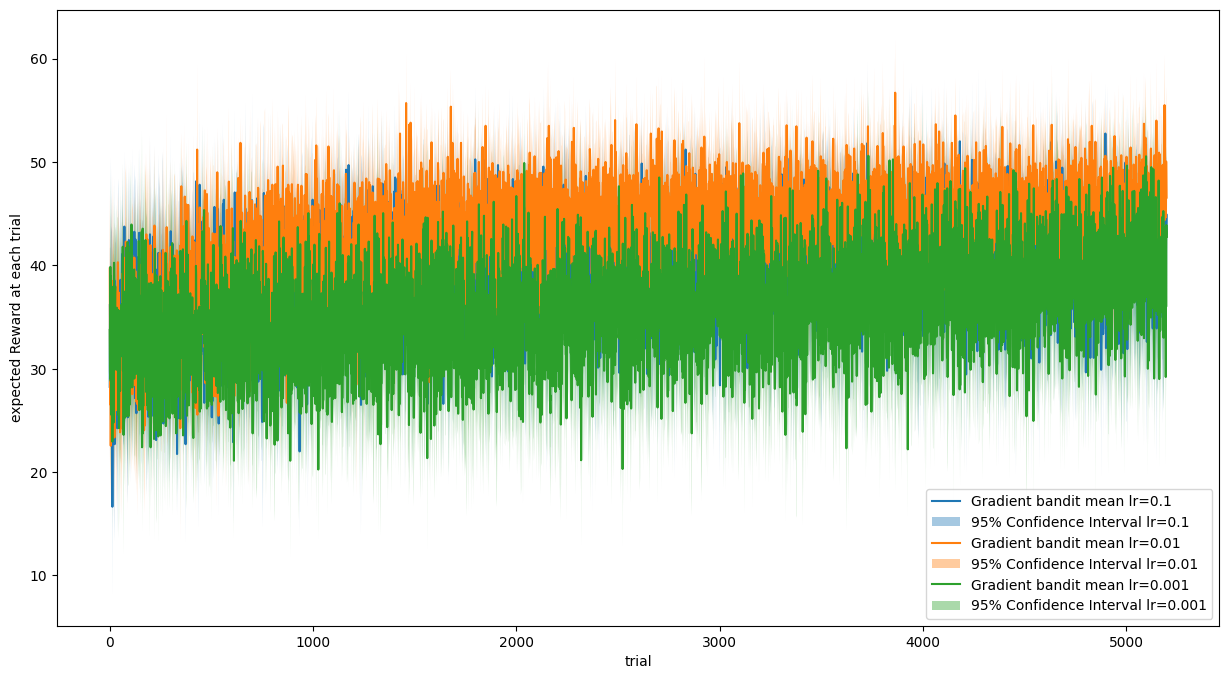

In [ ]:
plt.figure(figsize=(15,8))

for learning_rate in [0.1 , 0.01 , 0.001]:
    GB_results = GB_results_dic[learning_rate]
    [gb_R_expected,gb_R_std] = calculate_expected_reward(GB_results,number_of_school,number_trial)

    x = np.arange(number_trial)
    gb_R_expected = gb_R_expected.reshape((-1,))
    gb_R_std = gb_R_std.reshape((-1,))

    plt.plot(gb_R_expected,label='Gradient bandit mean lr='+ str(learning_rate))

    plt.fill_between( x, gb_R_expected - 1.96*gb_R_std/np.sqrt(10), gb_R_expected + 1.96*gb_R_std/np.sqrt(10), alpha=0.4, label='95% Confidence Interval lr='+ str(learning_rate))


plt.legend()
plt.xlabel("trial")
plt.ylabel("expected Reward at each trial")
plt.show()

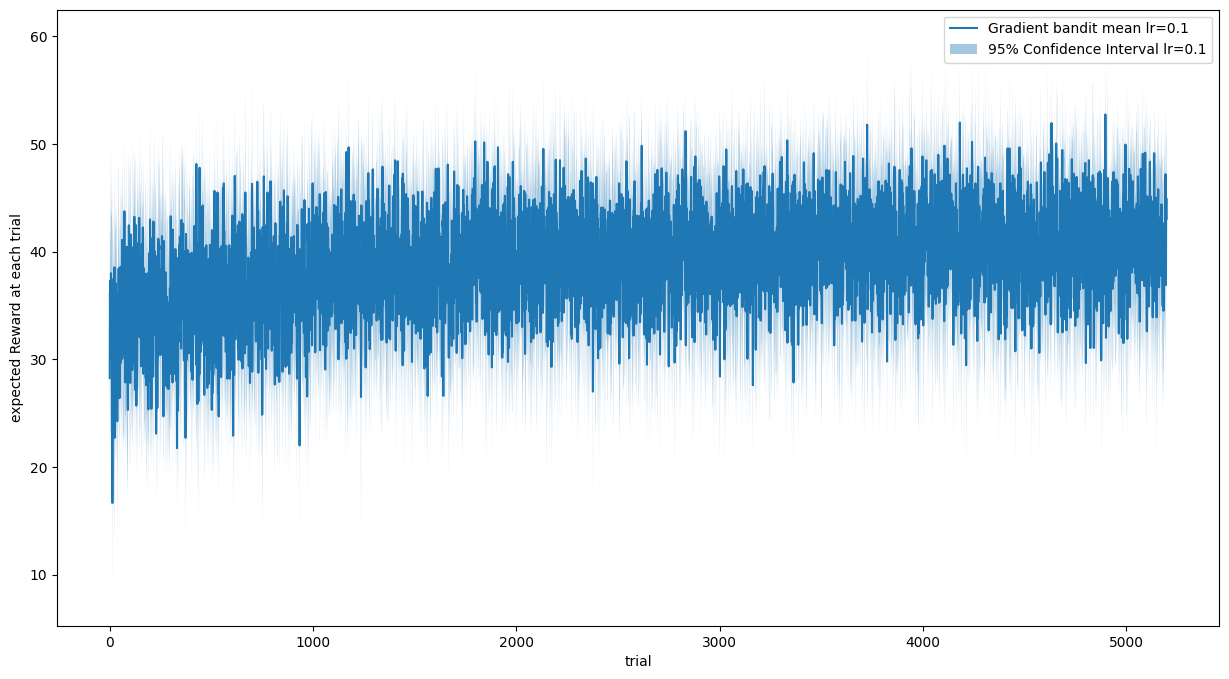

In [ ]:
plt.figure(figsize=(15,8))

for learning_rate in [0.1]:
    GB_results = GB_results_dic[learning_rate]
    [gb_R_expected,gb_R_std] = calculate_expected_reward(GB_results,number_of_school,number_trial)

    x = np.arange(number_trial)
    gb_R_expected = gb_R_expected.reshape((-1,))
    gb_R_std = gb_R_std.reshape((-1,))

    plt.plot(gb_R_expected,label='Gradient bandit mean lr='+ str(learning_rate))

    plt.fill_between( x, gb_R_expected - 1.96*gb_R_std/np.sqrt(10), gb_R_expected + 1.96*gb_R_std/np.sqrt(10), alpha=0.4, label='95% Confidence Interval lr='+ str(learning_rate))


plt.legend()
plt.xlabel("trial")
plt.ylabel("expected Reward at each trial")
plt.show()

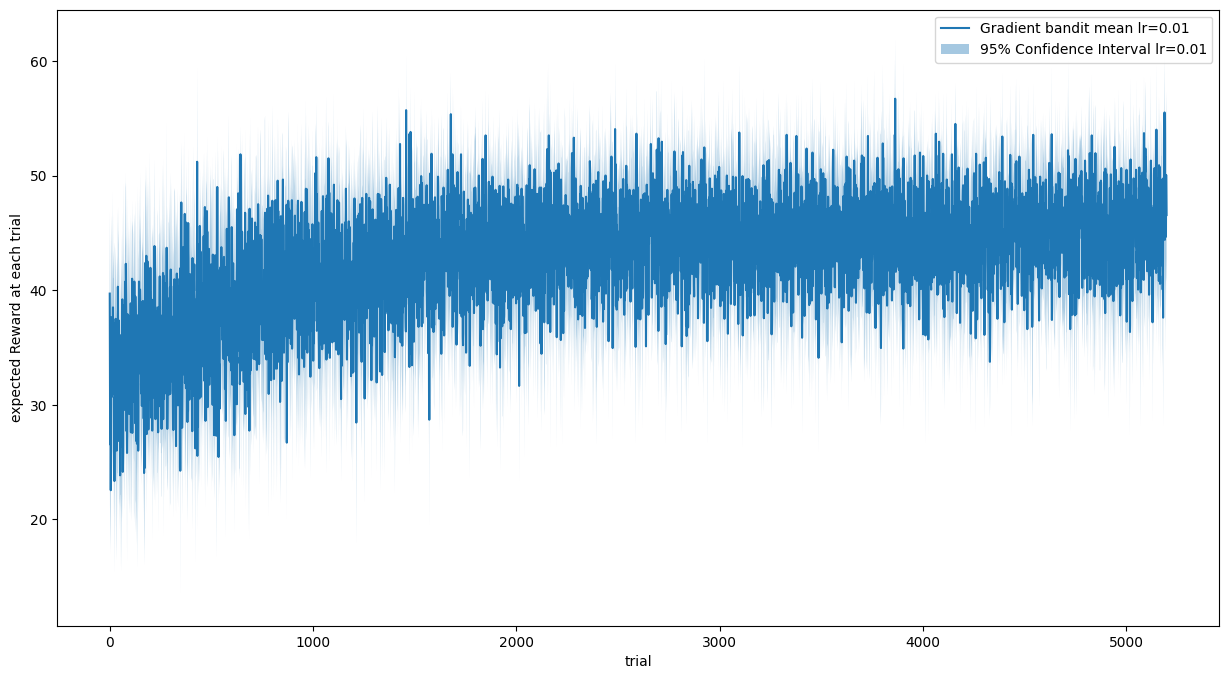

In [ ]:
plt.figure(figsize=(15,8))

for learning_rate in [0.01]:
    GB_results = GB_results_dic[learning_rate]
    [gb_R_expected,gb_R_std] = calculate_expected_reward(GB_results,number_of_school,number_trial)

    x = np.arange(number_trial)
    gb_R_expected = gb_R_expected.reshape((-1,))
    gb_R_std = gb_R_std.reshape((-1,))

    plt.plot(gb_R_expected,label='Gradient bandit mean lr='+ str(learning_rate))

    plt.fill_between( x, gb_R_expected - 1.96*gb_R_std/np.sqrt(10), gb_R_expected + 1.96*gb_R_std/np.sqrt(10), alpha=0.4, label='95% Confidence Interval lr='+ str(learning_rate))


plt.legend()
plt.xlabel("trial")
plt.ylabel("expected Reward at each trial")
plt.show()

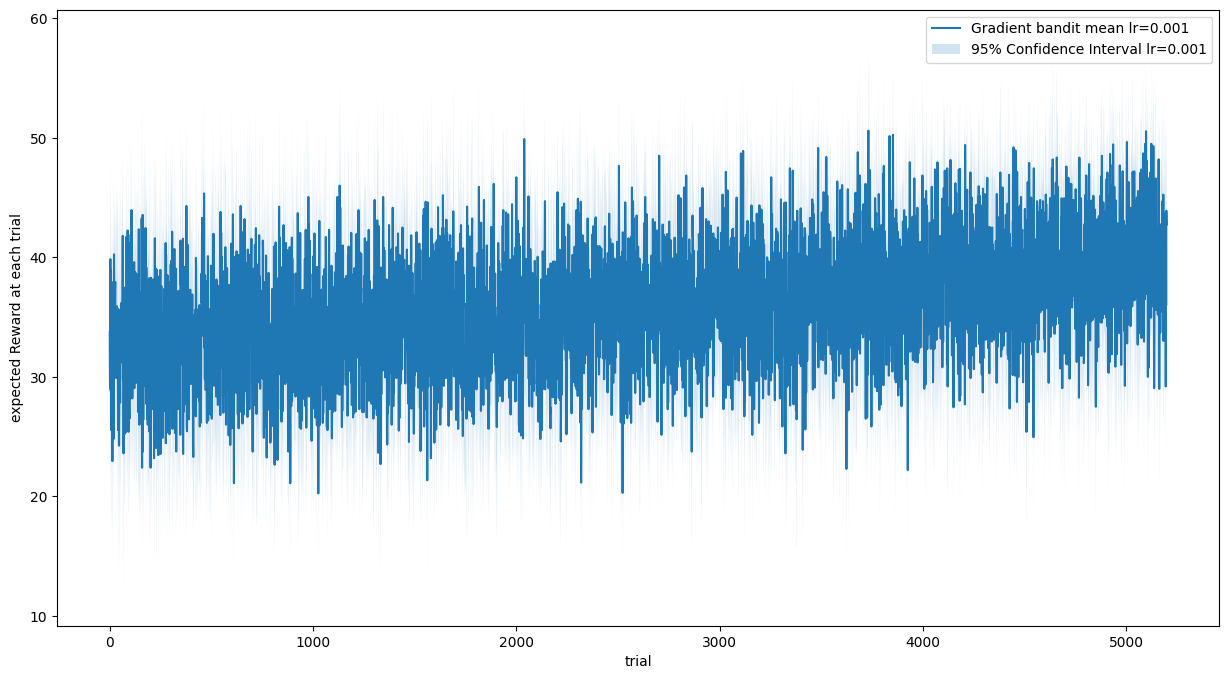

In [ ]:
plt.figure(figsize=(15,8))

for learning_rate in [0.001]:
    GB_results = GB_results_dic[learning_rate]
    [gb_R_expected,gb_R_std] = calculate_expected_reward(GB_results,number_of_school,number_trial)

    x = np.arange(number_trial)
    gb_R_expected = gb_R_expected.reshape((-1,))
    gb_R_std = gb_R_std.reshape((-1,))

    plt.plot(gb_R_expected,label='Gradient bandit mean lr='+ str(learning_rate))

    plt.fill_between( x, gb_R_expected - 1.96*gb_R_std/np.sqrt(10), gb_R_expected + 1.96*gb_R_std/np.sqrt(10), alpha=0.2, label='95% Confidence Interval lr='+ str(learning_rate))


plt.legend()
plt.xlabel("trial")
plt.ylabel("expected Reward at each trial")
plt.show()

In [ ]:
real_q_t1 = np.array([40 , 60 , 50 ]) / 2 + 20
real_q_t2 = np.array([70 , 50 , 60 ]) / 2 + 20
real_q_t3 = np.array([20 , 50 , 55 ]) / 2 + 20
real_q_t1 = real_q_t1.reshape([1,-1])
real_q_t2 = real_q_t2.reshape([1,-1])
real_q_t3 = real_q_t3.reshape([1,-1])
q_opt_t1 = 50
q_opt_t2 = 55
q_opt_t3 = 47.5
delta1  = q_opt_t1 - real_q_t1
delta2  = q_opt_t2 - real_q_t2
delta3  = q_opt_t3 - real_q_t3

delta = np.vstack((delta1,delta2,delta3))

def calculate_regret(result):
    regret_mean = np.zeros([number_trial,1])
    regret_std = np.zeros([number_trial,1])

    summer = np.zeros([number_of_school,1])
    for horizon in range(number_trial): # finding the regret for this horizon
        for sher in range(number_of_school):
            type_seq = result[sher][2]
            action_seq = result[sher][0]
            ac = action_seq[horizon]

            # convert ac to program ,
            (program,st_type) = number_to_indices(ac)
            st_type += 1 # it should begin from 1 to 3

            real_type = type_seq[horizon]

            if st_type == real_type:
                summer[sher] +=  delta[real_type-1,program]
            else:
                summer[sher] +=  delta[real_type-1,program] + 20


        regret_mean[horizon] = np.mean(summer)
        regret_std[horizon] = np.std(summer)

    return [regret_mean,regret_std]

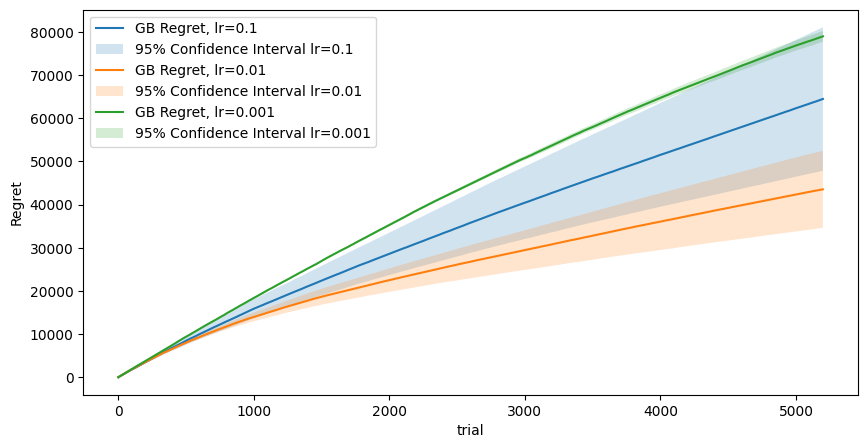

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
x = np.arange(number_trial)

for learning_rate in  [0.1 , 0.01 , 0.001]:
    GB_results = GB_results_dic[learning_rate]
    [regret_mean,regret_std] = calculate_regret(GB_results)
    regret_mean = regret_mean.reshape((-1,))
    regret_std = regret_std.reshape((-1,))
    plt.plot(regret_mean,label='GB Regret, lr='+ str(learning_rate))
    plt.fill_between( x, regret_mean - 1.96*regret_std/ np.sqrt(10), regret_mean + 1.96*regret_std/ np.sqrt(10), alpha=0.2, label='95% Confidence Interval lr='+ str(learning_rate))


plt.legend()
plt.xlabel("trial")
plt.ylabel("Regret")
plt.legend()
plt.show()